<a href="https://colab.research.google.com/github/sarobml2000/Review-Classifer/blob/main/Review_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In this NLP Project Yelp reviews are classified into 1 or 5 star categories.
#The Yelp Review Dataset from Kaggle was used for this purpose.(Link:https://www.kaggle.com/c/yelp-recsys-2013)

In [ ]:
#Dataset description:-
#The "stars" column is the number of stars which the business received from a particular user.
#The "cool" column is the number of "cool" votes the particular review recieved from other users(similar to "useful review").
#There is no limit to the number of "cool" votes a review can recieve.
#The "useful" and "funny" columns are similar to the "cool" column.
#The aim is to predict with a model that how many stars could a business possibly receive in the future.

In [ ]:
#Now Exploratory Data Analysis(EDA) is done on the dataset to find out patterns in the data which can be exploited.

In [ ]:
#Some essential libraries are imported in the beginning.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#The dataset is now read and stored in variable 'yelp'.

In [7]:
yelp = pd.read_csv('/content/drive/MyDrive/Projects/Yelp_Data/yelp.csv')

In [8]:
#Now some basic information about the dataset like head(),info() etc are checked.

In [9]:
yelp.head()

business_id        date  ... useful  funny
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  ...      5      0
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  ...      0      0
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  ...      1      0
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  ...      2      0
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  ...      0      0

[5 rows x 10 columns]

In [10]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [11]:
yelp.describe()

stars          cool        useful         funny
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       3.777500      0.876800      1.409300      0.701300
std        1.214636      2.067861      2.336647      1.907942
min        1.000000      0.000000      0.000000      0.000000
25%        3.000000      0.000000      0.000000      0.000000
50%        4.000000      0.000000      1.000000      0.000000
75%        5.000000      1.000000      2.000000      1.000000
max        5.000000     77.000000     76.000000     57.000000

In [12]:
#A new column called 'text length' is created which stores the no of words in the 'text' column.

In [13]:
yelp['text length'] = yelp['text'].apply(len)

In [14]:
#Now, the FacetGrid method from Seaborn library is used to create 5 histograms which show the distribution of review lengths with star ratings.
#This highlights how the nature of the review(the patience of the customer) varies for each star category.

In [15]:
sns.set_style('white')

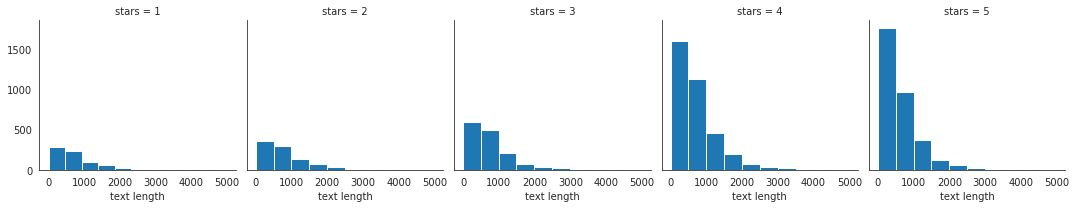

In [16]:
rating_map = sns.FacetGrid(yelp,col='stars')
rating_map.map(plt.hist,'text length')

In [17]:
#The same customer trend is brought out but through a different visualization.

In [18]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

In [19]:
#This countplot simply shows the no of 1,2..5 star ratings all businesses combined have got from customers.

In [20]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [21]:
#Now, all the numerical columns against each star rating is averaged.

In [22]:
stars = yelp.groupby('stars').mean()
stars

cool    useful     funny  text length
stars                                           
1      0.576769  1.604806  1.056075   826.515354
2      0.719525  1.563107  0.875944   842.256742
3      0.788501  1.306639  0.694730   758.498289
4      0.954623  1.395916  0.670448   712.923142
5      0.944261  1.381780  0.608631   624.999101

In [23]:
#Now the pearson correlation between columns is stored in the new Dataframe and used to create a Heatmap.

In [24]:
stars.corr()

cool    useful     funny  text length
cool         1.000000 -0.743329 -0.944939    -0.857664
useful      -0.743329  1.000000  0.894506     0.699881
funny       -0.944939  0.894506  1.000000     0.843461
text length -0.857664  0.699881  0.843461     1.000000

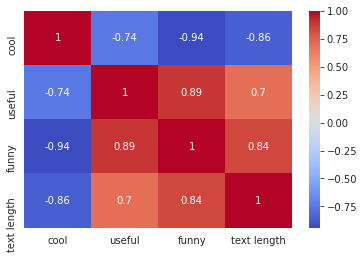

In [25]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

In [26]:
#Now the NLP model will be designed.

In [27]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [28]:
X = yelp_class['text']
y = yelp_class['stars']

In [29]:
#Importing CountVectorizer and creating it's object from the sklearn library.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [31]:
#The fit_transform method is used with the CountVectorizer object and X(the 'text' column) is passed.

In [32]:
X = cv.fit_transform(X)

In [33]:
#Now the train_test_split module is imported from sklearn and the data is divided into train and test sets.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [36]:
#Now the model is trained by using the NaiveBayes module.

In [37]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [38]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [39]:
#Storing the newly trained model's predictions.

In [40]:
predictions = nb.predict(X_test)

In [41]:
#Creating the confusion matrix and classification report to see how the model has performed.

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [44]:
#From the above classification report we can see that we have a pretty F1 score and recall as well.
#Therefore using our NaiveBayes model we tried to predict the business rating on Yelp and achieved an accuracy of 93%.